Example notebook to recreate Fig. 6 (calibrated TFR) for the DR1 TF paper.

In [1]:
import numpy as np

from astropy.io import fits

import matplotlib.pyplot as plt

# Data

## Galaxies

In [4]:
hdul = fits.open('fig6_data.fits')

n = len(hdul) - 1

gals = []
for i in range(n):
    gals.append(hdul[i+1].data)

hdul.close()

In [5]:
x, xerr = [], []
y, yerr = [], []

for i in range(n):
    
    x.append(gals[i]['LOGV'])
    y.append(gals[i]['R_MAG'])
    
    xerr.append(gals[i]['LOGV_ERR'])
    yerr.append(gals[i]['R_MAG_ERR'])

## Calibrated TFR

In [6]:
hdul = fits.open('../Fig7/fig7_data.fits')

hdr = hdul[0].header
mcmc_samples = hdul[0].data

hdul.close()

In [7]:
logV0 = hdr['LOG_V0']

a_fit = np.median(mcmc_samples[0])

b_fit = np.zeros(n)
for i in range(n):
    b_fit[i] = np.median(mcmc_samples[i+1])

# Plot

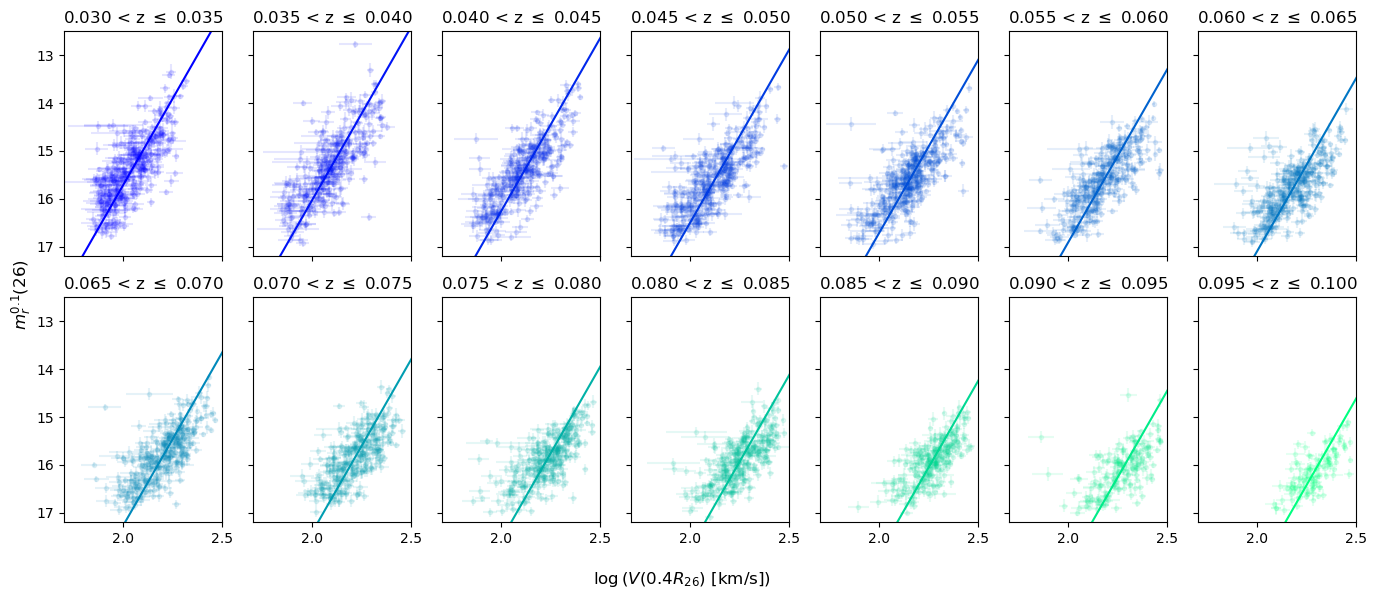

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=7, 
                        sharex=True, sharey=True, 
                        figsize=(14,6), 
                        tight_layout=True)

_logv = np.arange(0, 3, 0.1) - logV0

color = iter(plt.cm.winter(np.linspace(0,1,n)))
for i in range(n):
    c = next(color)
    
    row = int(i/7)
    col = i%7
    
    eb = axs[row,col].errorbar(logV0 + x[i], y[i],
                               xerr=xerr[i], yerr=yerr[i],
                               fmt='.', color=c, alpha=0.1)
    axs[row,col].plot(_logv + logV0, a_fit*_logv + b_fit[i], color=c)

    z_start = 0.03 + i*0.005
    z_end = 0.035 + i*0.005
    axs[row,col].set(xlim=[1.7, 2.5], 
                     ylim=[17.2, 12.5], 
                     title=f'{z_start:.3f} < z $\leq$ {z_end:.3f}')

fig.supxlabel(r'$\log{(V(0.4R_{26})~[\mathrm{km/s}]}$)')
fig.supylabel(r'$m_r^{0.1} (26)$');